**Rasa is Opensource Machine Learning framework used for developing AI based chatbot.**


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install rasa==1.10.3

     |████████████████████████████████| 510 kB 5.0 MB/s 
     |████████████████████████████████| 72 kB 519 kB/s 
     |████████████████████████████████| 47 kB 4.3 MB/s 
     |████████████████████████████████| 96 kB 6.0 MB/s 
     |████████████████████████████████| 58 kB 5.1 MB/s 
     |████████████████████████████████| 3.0 MB 49.6 MB/s 
     |████████████████████████████████| 375 kB 70.4 MB/s 
     |████████████████████████████████| 104 kB 61.4 MB/s 
     |████████████████████████████████| 422.0 MB 31 kB/s 
     |████████████████████████████████| 51 kB 307 kB/s 
     |████████████████████████████████| 148 kB 45.9 MB/s 
     |████████████████████████████████| 101 kB 10.4 MB/s 
     |████████████████████████████████| 1.6 MB 41.9 MB/s 
     |████████████████████████████████| 509 kB 74.8 MB/s 
     |████████████████████████████████| 7.1 MB 31.6 MB/s 
     |████████████████████████████████| 266 kB 60.4 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |█████████████████████

In [4]:
!python -m spacy download en

     |████████████████████████████████| 12.0 MB 5.0 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [5]:
!pip install nest_asyncio==1.3.3

  Attempting uninstall: nest-asyncio
    Found existing installation: nest-asyncio 1.5.4
    Uninstalling nest-asyncio-1.5.4:
      Successfully uninstalled nest-asyncio-1.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbclient 0.5.9 requires jupyter-client>=6.1.5, but you have jupyter-client 5.3.5 which is incompatible.


In [6]:
import os
import rasa
import nest_asyncio

nest_asyncio.apply()
print("Event loop ready.")

Event loop ready.


In [7]:
from rasa.cli.scaffold import create_initial_project

In [8]:
project = "test-project"
create_initial_project(project)

In [9]:
# move into project directory and show files
os.chdir(project)
print(os.listdir("."))

['tests', 'config.yml', 'actions.py', 'data', 'credentials.yml', 'domain.yml', '__init__.py', 'endpoints.yml', '__pycache__']


In [10]:
config = "config.yml"
training_files = "data/"
domain = "domain.yml"
output = "models/"
print(config, training_files, domain, output)

config.yml data/ domain.yml models/


### Sometime it may not run on first go. So, try to execute below line 3 time and it work fine. It is bug in rasa.

In [13]:
model_path = rasa.train(domain, config, [training_files], output)
print(model_path)

Training Core model...


Processed trackers: 100%|██████████| 5/5 [00:00<00:00, 118.47it/s, # actions=16]
Processed actions: 16it [00:00, 695.93it/s, # examples=16]
Epochs:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/rasa/utils/tensorflow/model_data.py:386: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  final_data[k].append(np.concatenate(np.array(v)))
Epochs: 100%|██████████| 100/100 [00:16<00:00,  6.14it/s, t_loss=0.076, loss=0.004, acc=1.000]


Core model training completed.
Training NLU model...


/usr/local/lib/python3.7/dist-packages/rasa/utils/common.py:363: UserWarning: You specified 'DIET' to train entities, but no entities are present in the training data. Skip training of entities.
Epochs:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/rasa/utils/tensorflow/model_data.py:386: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  final_data[k].append(np.concatenate(np.array(v)))
Epochs: 100%|██████████| 100/100 [00:17<00:00,  5.66it/s, t_loss=1.481, i_loss=0.099, i_acc=1.000]


NLU model training completed.
Your Rasa model is trained and saved at '/content/test-project/models/20211218-211728.tar.gz'.
models/20211218-211728.tar.gz


In [14]:
from rasa.jupyter import chat

endpoints = 'endpoints.yml'

chat(model_path, endpoints)


Your bot is ready to talk! Type your messages here or send '/stop'.
hi
Hey! How are you?
/stop


In [ ]:
chat(model_path, endpoints)

In [16]:
%%writefile data/nlu.md
## intent:check_in
- What are your check-in timings?
- check-in timings of your hotel is?
- can you tell me the check-in timing of your hotel?
- Is there any check-in timing of hotel?

## intent:dangkyphong
- Thời gian nhận phòng?
- thời gian nhận phòng là khi nào?
- khi nào khách sạn cho nhận phòng?

## intent:check_out
- What are your check-out timings?
- check-out timings of your hotel is?
- can you tell me the check-out timing of your hotel?
- Is there any check-out timing of hotel?

## intent:traphong
- Thời gian trả phòng?
- tôi muốn trả phòng

## intent:cancel_resr
- How do I cancel a reservation?
- Procedure of cancel a hotel?
- Please cancel my reservation.
- Can You please cancel my reservation?

## intent:huyphong
- Làm thế nào để hủy phòng?
- làm ơn giúp tôi hủy phòng đã đặt 
- tôi muốn hủy phòng đã đặt

## intent:can_policy
- What is your cancellation policy?
- can you tell me about the cancellation policy of your hotel?
- cancellation policy of your hotel?
- Is there any cancellation plicy of your hotel?
- cancellation Policy of your hotel?

## intent:chinhsach_huyphong
- Chính sách hủy phòng của khách sạn là gì?
- Khách sạn có hủy đặt phòng không?

## intent:restaurant
- Does the hotel have a restaurant?
- Is there any restaurant in hotel?
- Any facilities of restaurant in hotel?
- any restaurant in hotel?
- did any restaurant in hotel?

## intent:nhahang
- Khách sạn có nhà hàng không?
- Có nhà hàng nào trong khách sạn không?

## intent:breakfast
- Does the hotel offer breakfast?
- Any idea about breakfast offer by hotel?
- any complementary breakfast offer by hotel?
- Breakfast offer by hotel?
- breakfast provided by hotel?

## intent:buasang
- Khách sạn có phục vụ bữa sáng không?
- Khách sạn có cung cấp bữa sáng không?

## intent:break_time
- What are the breakfast timings?
- Is there any breakfast timing?
- can you tell me the breakfast timing of hotel?
- breakfast timing?
- what is the breakfast timing of the hotel?

## intent:gioansang
- Giờ ăn sáng là khi nào?
- Có giờ ăn sáng không?
- bạn có thể cho tôi biết thời gian ăn sáng ở khách sạn không?
- thời gian ăn sáng?
- thời gian ăn sáng của khách sạn là khi nào?

## intent:rest_time
- What are the timings of your restaurant?
- Is there any timing of your restaurant?
- timing of your restaurant?
- can you tell me the restaurant timing of your hotel?

## intent:thoigiannhahang
- Thời gian của nhà hàng của bạn là gì?
- Có bất kỳ thời gian nào của nhà hàng của bạn?
- thời gian của nhà hàng của bạn?
- bạn có thể cho tôi biết thời gian mở nhà hàng của khách sạn bạn không?

## intent:clean_now
- can you send someone right now for cleaning.
- send someone right now
- right now please
- i prefer right now
- please clean my room rightnow.

## intent:dondepngay
- bạn có thể cử người đến dọn dẹp ngay bây giờ không.
- gửi ai đó ngay bây giờ
- ngay bây giờ làm ơn
- tôi thích ngay bây giờ
- làm ơn dọn dẹp phòng của tôi ngay bây giờ.

## intent:clean
- i want to clean my room
- can you send somebody to clean my room
- can you send room service to clean my room
- clean my room please
- send someone to clean my room.

## intent:dondep
- tôi muốn dọn phòng của mình
- bạn có thể cử người đến dọn phòng của tôi được không
- bạn có thể gửi dịch vụ phòng để dọn phòng cho tôi được không
- làm ơn dọn dẹp phòng của tôi
- cử người đến dọn phòng cho tôi.

## intent:deluxe
- i need deluxe room
- i want deluxe room
- deluxe rooms
- can i get the deluxe rooms
- i am looking for deluxe rooms

## intent:phonghangsang
- tôi cần phòng hạng sang
- tôi muốn phòng hạng sang
- phòng hạng sang
- tôi có thể lấy phòng hạng sang được không
- tôi đang tìm phòng hạng sang

## intent:simple
- i need simple room
- i want simple room
- simple room
- i am looking for simple room
- can i get the simple rooms

## intent:phongdon
- tôi cần phòng đơn giản
- tôi muốn phòng đơn giản
- phòng đơn giản
- tôi đang tìm phòng đơn giản
- tôi có thể lấy những căn phòng đơn giản không

## intent:num_room
- I need [2](number) rooms
- is [3](number) room available
- [4](number) rooms
- can i get the [3](number) rooms
- I want [3](number) rooms.

## intent:so_phong
- Tôi cần [2](số) phòng
- có [3](số) phòng trống không
- [4](số) phòng
- tôi có thể lấy [3](số) phòng không
- Tôi muốn [3](số) phòng.

## intent:book_room
- i want to book a room
- i need a room
- i am looking for a room
- is room empty
- book a room for a night.

## intent:dat_phong
- tôi muốn đặt phòng
- Tôi cần một căn phòng
- tôi đang tìm phòng
- có phòng trống không
- đặt phòng cho một đêm.

## intent:greet
- hey
- hello
- hi
- good morning
- good evening
- hey there

## intent:chao
- xin chào
- Chào
- chào buổi sáng
- chào buổi tối
- này đó

## intent:goodbye
- bye
- goodbye
- see you around
- see you later

## intent:tambiet
- tạm biệt
- Tạm biệt
- hẹn gặp lại bạn
- hẹn gặp lại

## intent:affirm
- yes
- indeed
- of course
- that sounds good
- correct

## intent:xacnhan
- Đúng
- Vâng
- Đương nhiên
- nghe hay đấy
- Chính xác

## intent:deny
- no
- never
- I don't think so
- don't like that
- no way
- not really

##intent:tuchoi
- không
- không bao giờ
- tôi không nghĩ vậy
- không thích điều đó
- Không đời nào
- không hẳn

## intent:mood_great
- perfect
- very good
- great
- amazing
- wonderful
- I am feeling very good
- I am great
- I'm good

## intent:tttot
- hoàn hảo
- rất tốt
- tuyệt vời
- tuyệt vời
- Tuyệt vời
- Tôi đang cảm thấy rất tốt
- tôi rất tuyệt
- Tôi ổn

## intent:mood_unhappy
- sad
- very sad
- unhappy
- bad
- very bad
- awful
- terrible
- not very good
- extremely sad
- so sad

## intent:ttbun
- buồn
- rất buồn
- không vui
- tồi tệ
- rất tệ
- kinh khủng
- kinh khủng
- không tốt lắm
- rất buồn
- buồn quá

## intent:bot_challenge
- are you a bot?
- are you a human?
- am I talking to a bot?
- am I talking to a human?

## intent:hoibot
- bạn là robot?
- Bạn có phải là con người?
- tôi đang nói chuyện với một con bot?
- Tôi đang nói chuyện với một con người?

Overwriting data/nlu.md


In [17]:
%%writefile domain.yml

intents:
  - greet
  - goodbye
  - affirm
  - deny
  - mood_great
  - mood_unhappy
  - bot_challenge
  - book_room
  - num_room
  - simple
  - deluxe
  - clean
  - clean_now
  - check_in
  - check_out
  - cancel_resr
  - can_policy
  - restaurant
  - breakfast
  - break_time
  - rest_time
  - dangkyphong
  - traphong
  - huyphong
  - chinhsach_huyphong
  - nhahang
  - gioansang
  - thoigiannhahang
  - dondepngay
  - dondep
  - phongdon
  - so_phong
  - dat_phong
  - chao
  - tambiet
  - tttot
  - xacnhan
  - ttbun
  - tuchoi
  - hoibot

responses:

  utter_can_policy:
  - text: "The booking deposit is refundable if the cancellation occurs at least 15 days before arrival.For cancellations made after this limit, a penalty will be imposed based on the cancellation policy."

  utter_qdhuy:
  - text: "Đặt cọc đặt phòng sẽ được hoàn lại nếu việc hủy đặt phòng xảy ra ít nhất 15 ngày trước khi đến. Đối với các trường hợp hủy đặt phòng sau thời hạn này, sẽ bị phạt dựa trên chính sách hủy đặt phòng."

  utter_restaurant:
  - text: "Yes, the hotel has a restaurant called the Zephyr Bar. With our menu we strive to reflect the historic art and the spirit of our neighborhood by offering a glimpse into what makes our area unique."

  utter_nhahang:
  - text: "Có, khách sạn có một nhà hàng tên là Zephyr Bar. Với thực đơn của mình, chúng tôi cố gắng phản ánh nghệ thuật lịch sử và tinh thần của khu vực lân cận của chúng tôi bằng cách cung cấp cái nhìn thoáng qua về những gì làm cho khu vực của chúng tôi trở nên độc đáo"

  utter_breakfast:
  - text: "The hotel provides its guests with a free made-to-order breakfast each morning."

  utter_buasang:
  - text: "Khách sạn cung cấp cho khách bữa sáng miễn phí theo yêu cầu hàng ngày"

  utter_break_time:
  - text: "Monday through Friday breakfast is 6 am to 9 am. On Saturday and Sunday, we are open from 7 am to 10:30 am."

  utter_gioansang:
  - text: "Bữa sáng từ thứ Hai đến thứ Sáu là 6 giờ sáng đến 9 giờ sáng. Thứ bảy và chủ nhật, chúng tôi mở cửa từ 7 giờ sáng đến 10 giờ 30 phút sáng."
  
  utter_rest_time:
  - text: "Our restaurant serves a dazzling 24-hour menu."

  utter_tgphucvu:
  - text: "Nhà hàng của chúng tôi phục vụ thực đơn 24 giờ."

  utter_check_in:
  - text: "Check-in time starts at 4 PM. Minimum check-in age is 21.Please contact the reception for early check-in requests."

  utter_dangky:
  - text: "Thời gian nhận phòng bắt đầu từ 4 giờ chiều. Độ tuổi nhận phòng tối thiểu là 21. Vui lòng liên hệ lễ tân để được yêu cầu nhận phòng sớm."

  utter_check_out:
  - text: "Check-out time is 11 AM. Please contact the reception for late checkout requests."

  utter_traphong:
  - text: "Giờ trả phòng là 11 giờ sáng. Vui lòng liên hệ lễ tân nếu có yêu cầu trả phòng trễ"
  
  utter_cancel_resr:
  - text: "To cancel a reservation, select the “Reservations” link from the homepage."

  utter_huyphong:
  - text: "Để hủy đặt chỗ, hãy chọn liên kết “Đặt phòng” từ trang chủ."

  utter_clean_now:
  - text:"sure, I will send someone to your room right now."

  utter_dondepngay:
  - text:"chắc chắn, tôi sẽ cử người đến phòng của bạn ngay bây giờ."

  utter_clean:
  - text:"When should i arrange for the cleaing?"

  utter_dondep:
  - text:"Khi nào tôi nên sắp xếp việc phân chia?"

  utter_deluxe:
  - text:" You have choosen to book a Deluxe rooms"

  utter_phonghangsang:
  - text:"Bạn đã chọn đặt phòng hạng sang"

  utter_simple:
  - text: "You have choosen to book a simple rooms."

  utter_phongdon:
  - text: "Bạn đã chọn đặt phòng đơn."

  utter_num_room:
  - text: "what type of room would you want to book - simple room or Deluxe room ?"

  utter_sophong:
  - text: "loại phòng bạn muốn đặt - phòng đơn giản hay phòng hạng sang?"

  utter_book_room:
  - text: "How many room would you like to book?"

  utter_datphong:
  - text: "Bạn muốn đặt bao nhiêu phòng?"

  utter_greet:
  - text: "Hey! How may i help you?"

  utter_chao:
  - text: "Chào! Tôi có thể giúp gì cho bạn?"

  utter_cheer_up:
  - text: "Here is something to cheer you up:"
    image: "https://i.imgur.com/nGF1K8f.jpg"

  utter_chaomung:
  - text: "Không sao cố lên ^^:"
    image: "https://i.imgur.com/nGF1K8f.jpg"

  utter_did_that_help:
  - text: "Did that help you?"

  utter_hoigiup:
  - text: "Điều đó có giúp được gì cho bạn không?"

  utter_happy:
  - text: "Great, carry on!"

  utter_vui:
  - text: "Tuyệt vời!"

  utter_goodbye:
  - text: "Bye"

  utter_tambiet:
  - text: "Tạm biệt"


  utter_iamabot:
  - text: "I am a bot, powered by Rasa."

  utter_tuirobot:
  - text: "Tôi là một bot, được cung cấp bởi Rasa."

entities:
  - number
  - số

session_config:
  session_expiration_time: 60
  carry_over_slots_to_new_session: true


Overwriting domain.yml


In [18]:
%%writefile data/stories.md

## check in
* greet
  - utter_greet
* check_in
  - utter_check_in
* chao
  - utter_chao
* dangkyphong
 - utter_dangky

## check out
* greet
  - utter_greet
* check_out
  - utter_check_out
* chao
  - utter_chao
* traphong
  - utter_traphong

## cancel reservation
* greet
  - utter_greet
* cancel_resr
  - utter_cancel_resr
* chao
  - utter_chao
* huyphong
 - utter_huyphong

## policy
* greet
  - utter_greet
* can_policy
  - utter_can_policy
* chao
  - utter_chao
* chinhsach_huyphong
 - utter_qdhuy

## Restaurant details
* greet
  - utter_greet
* restaurant
  - utter_restaurant
* chao
  - utter_chao
* nhahang
 - utter_nhahang

## break fast
* greet
  - utter_greet
* breakfast
  - utter_breakfast
* chao
  - utter_chao
* buasang
 - utter_buasang

## break time
* greet
  - utter_greet
* break_time
  - utter_break_time
* chao
  - utter_chao
* gioansansang
 - utter_gioansang

## rest time
* greet
  - utter_greet
* rest_time
  - utter_rest_time
* chao
  - utter_chao
* thoigiannhahang
 - utter_tgphucvu

## clean_room
* greet
  - utter_greet
* clean
  - utter_clean
* clean_now
  - utter_clean_now
* chao
  - utter_chao
* dondep
 - utter_dondep
*dondepngay
 - utter_dondepngay

## book_simple_room
* greet
  - utter_greet
* book_room
  - utter_book_room
* num_room
  - utter_num_room
* simple 
  - utter_simple
* chao
  - utter_chao
* dat_phong
 - utter_datphong
*so_phong
 - utter_sophong
* phongdon
  - utter_phongdon


## book_deluxe_room
* greet
  - utter_greet
* book_room
  - utter_book_room
* num_room
  - utter_num_room
* deluxe
  - utter_deluxe
* chao
  - utter_chao
* dat_phong
  - utter_datphong
*so_phong
 - utter_sophong
* phonghangsang
 - utter_phonghangsang

## happy path
* greet
  - utter_greet
* mood_great
  - utter_happy
* chao
  - utter_chao
* tttot
 - utter_vui

## sad path 1
* greet
  - utter_greet
* mood_unhappy
  - utter_cheer_up
  - utter_did_that_help
* affirm
  - utter_happy
* chao
  - utter_chao
* ttbun
  - utter_chaomung
*xacnhan
  - utter_vui

## sad path 2
* greet
  - utter_greet
* mood_unhappy
  - utter_cheer_up
  - utter_did_that_help
* deny
  - utter_goodbye
* chao
  - utter_chao
* ttbun
  - utter_chaomung
  - utter_hoigiup
*tuchoi
  - utter_tambiet

## say goodbye
* goodbye
  - utter_goodbye
* tambiet
  - utter_tambiet


## bot challenge
* bot_challenge
  - utter_iamabot
* hoibot
  - utter_tuirobot


Overwriting data/stories.md


In [19]:
model_path =  rasa.train(domain, config, [training_files], output)
print(model_path)

/usr/local/lib/python3.7/dist-packages/rasa/core/domain.py:137: FutureWarning: Templates should not be strings anymore. Utterance template 'utter_clean_now' should contain either a '- text: ' or a '- custom: ' attribute to be a proper template.
  utter_templates = cls.collect_templates(data.get("responses", {}))
/usr/local/lib/python3.7/dist-packages/rasa/core/domain.py:137: FutureWarning: Templates should not be strings anymore. Utterance template 'utter_dondepngay' should contain either a '- text: ' or a '- custom: ' attribute to be a proper template.
  utter_templates = cls.collect_templates(data.get("responses", {}))
/usr/local/lib/python3.7/dist-packages/rasa/core/domain.py:137: FutureWarning: Templates should not be strings anymore. Utterance template 'utter_clean' should contain either a '- text: ' or a '- custom: ' attribute to be a proper template.
  utter_templates = cls.collect_templates(data.get("responses", {}))
/usr/local/lib/python3.7/dist-packages/rasa/core/domain.py:13

Training Core model...


Processed trackers: 100%|██████████| 16/16 [00:00<00:00, 64.28it/s, # actions=117]
Processed actions: 117it [00:00, 792.34it/s, # examples=117]
Epochs:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/rasa/utils/tensorflow/model_data.py:386: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  final_data[k].append(np.concatenate(np.array(v)))
Epochs: 100%|██████████| 100/100 [02:05<00:00,  1.25s/it, t_loss=0.204, loss=0.013, acc=1.000]


Core model training completed.
Training NLU model...


/usr/local/lib/python3.7/dist-packages/rasa/nlu/classifiers/diet_classifier.py:595: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  for tag_name, tag_ids in tag_name_to_tag_ids.items()
Epochs:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/rasa/utils/tensorflow/model_data.py:386: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  final_data[k].append(np.concatenate(np.array(v)))
Epochs: 100%|██████████| 100/100 [01:52<00:00,  1.12s/it, t_loss=3.271, i_loss=1.332, entity_loss=0.052, i_acc=0.925, entity_f1=0.451]


NLU model training completed.
Your Rasa model is trained and saved at '/content/test-project/models/20211218-212317.tar.gz'.
models/20211218-212317.tar.gz


In [20]:
endpoints = "endpoints.yml"
chat(model_path, endpoints)

Instructions for updating:
Use tf.identity instead.
Your bot is ready to talk! Type your messages here or send '/stop'.
xin chào
Chào! Tôi có thể giúp gì cho bạn?
tôi muốn đặt phòng
Bạn muốn đặt bao nhiêu phòng?
4 phòng 
loại phòng bạn muốn đặt - phòng đơn giản hay phòng hạng sang?
phòng đơn
Bạn đã chọn đặt phòng đơn.
Có nhà hàng nào trong khách sạn không?
Tạm biệt
ok
You have choosen to book a simple rooms.
/stop


In [ ]:
chat(model_path, endpoints)

Your bot is ready to talk! Type your messages here or send '/stop'.
hey
Hey! How may i help you?
i want to know the cancelation policy
The booking deposit is refundable if the cancellation occurs at least 15 days before arrival.For cancellations made after this limit, a penalty will be imposed based on the cancellation policy.
/stop


In [21]:
import rasa.data as data

stories_directory, nlu_data_directory = data.get_core_nlu_directories(training_files)

print(stories_directory, nlu_data_directory)

/tmp/tmpht27v6hx /tmp/tmp6ck198a_


/usr/local/lib/python3.7/dist-packages/rasa/core/training/dsl.py:431: UserWarning: Found unknown intent 'buasang' on line 59. Please, make sure that all intents are listed in your domain yaml.
  docs=DOCS_URL_DOMAINS,
/usr/local/lib/python3.7/dist-packages/rasa/core/training/dsl.py:431: UserWarning: Found unknown intent 'gioansansang' on line 69. Please, make sure that all intents are listed in your domain yaml.
  docs=DOCS_URL_DOMAINS,
/usr/local/lib/python3.7/dist-packages/rasa/core/training/dsl.py:431: UserWarning: Found unknown intent 'phonghangsang' on line 130. Please, make sure that all intents are listed in your domain yaml.
  docs=DOCS_URL_DOMAINS,
100%|██████████| 201/201 [00:02<00:00, 85.78it/s]
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

Done testing...


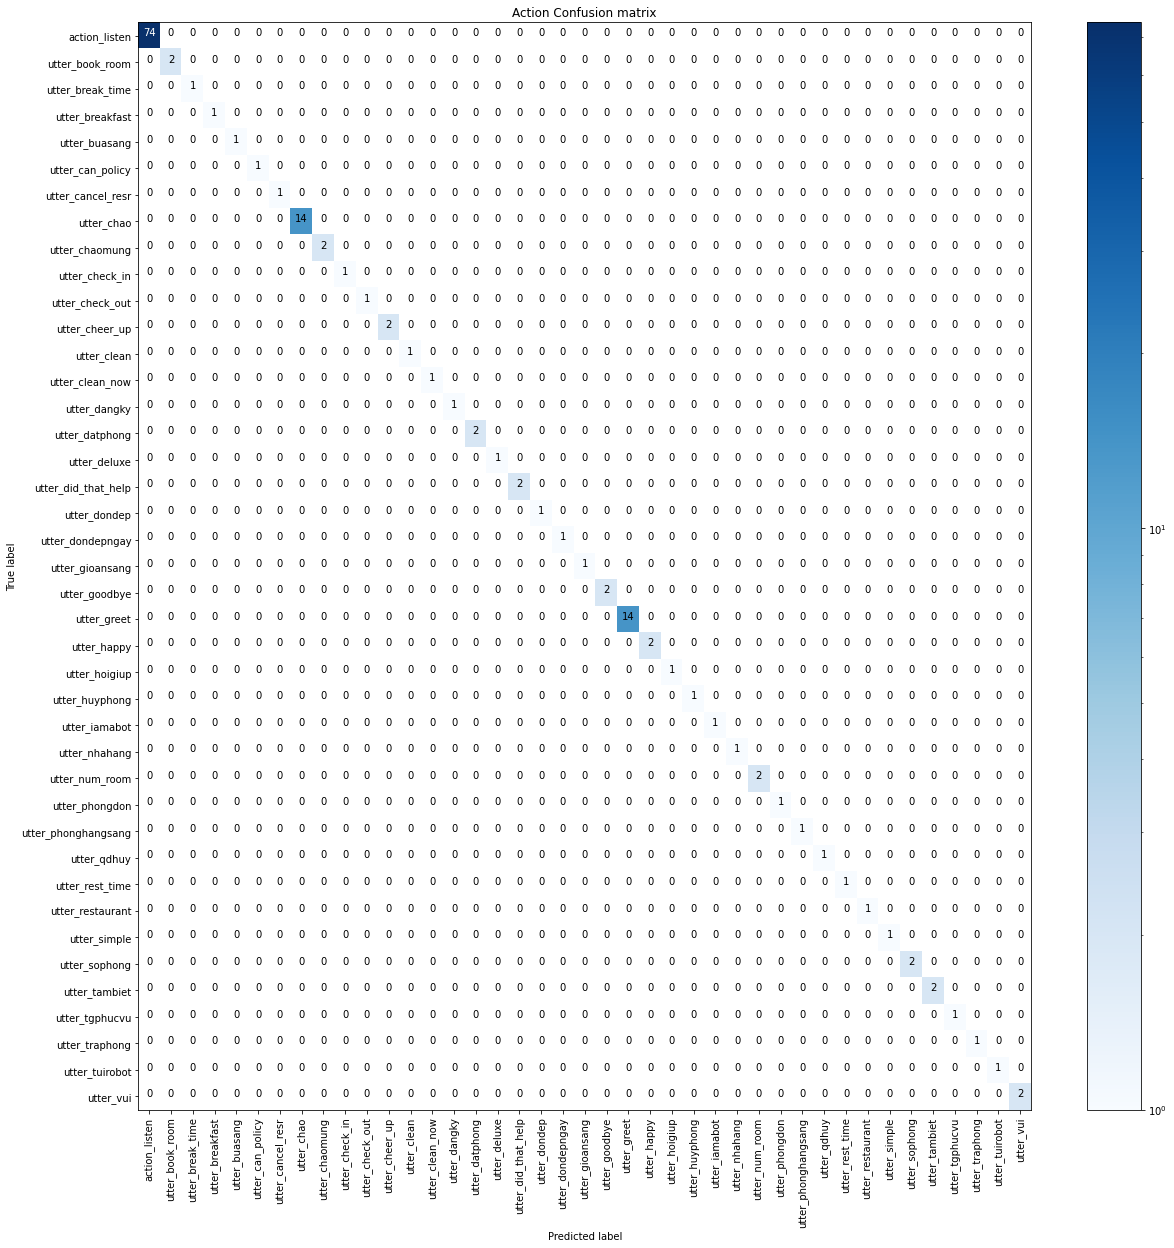

In [22]:
rasa.test(model_path, stories_directory, nlu_data_directory)

print("Done testing...")